In this file, Image classification will be conducted using K Nearest Neighbor algorithm using Python without any ML libraries to practice the fundamental skill of the algorithm. After the accuracy is analyzed, classification will be done again but using a machine learning library to practice practical skills and tools used in the industry.

In [1]:
#----- Import dependencies ------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import cv2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf

In [25]:
#----- Load the mnist dataset and visualize ------
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data() # Use TF to load the CIFAR-10 dataset


# Print the shape of the datasets
print(f'The shape for X_train: {X_train.shape}')
print(f'The shape for X_test: {X_test.shape}')
print(f'The shape for y_train: {y_train.shape}')
print(f'The shape for y_test: {y_test.shape}')



The shape for X_train: (50000, 32, 32, 3)
The shape for X_test: (10000, 32, 32, 3)
The shape for y_train: (50000, 1)
The shape for y_test: (10000, 1)


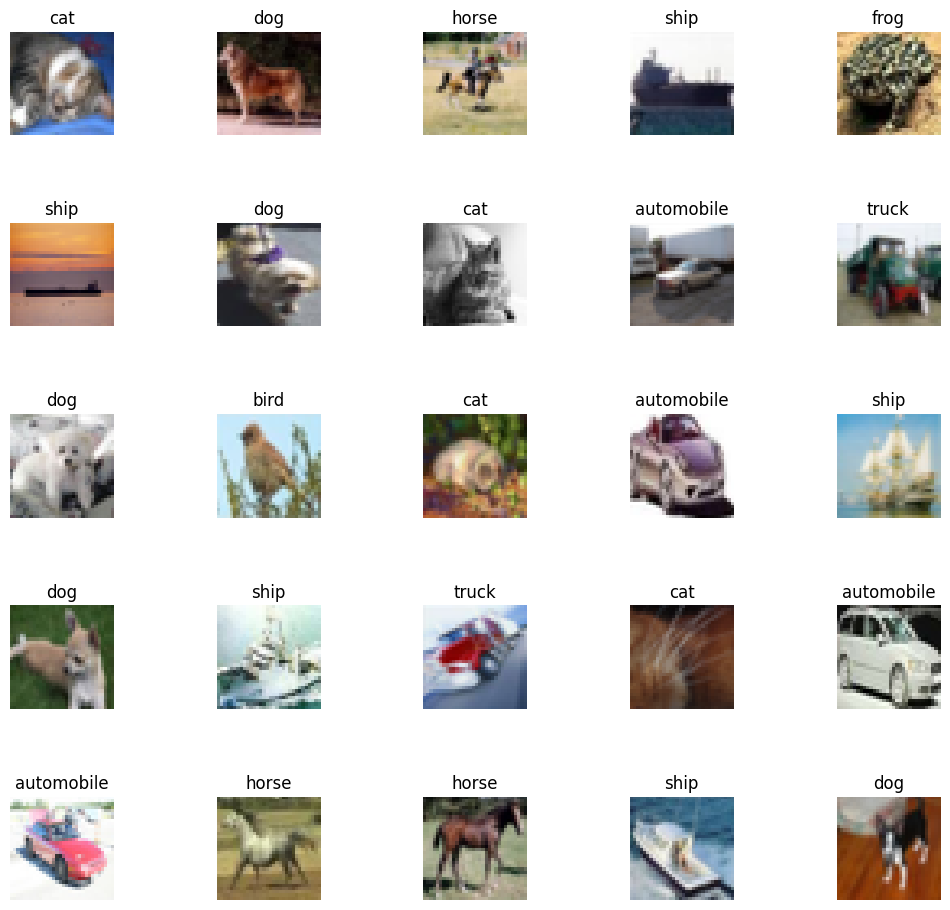

In [18]:
# Create a function to display images
def showImages(num_row,num_col,X,Y):
    import matplotlib.pyplot as plt
    %matplotlib inline

    from sklearn.utils import shuffle
    (X_rand, Y_rand) = shuffle(X, Y)
    
    fig, axes = plt.subplots(num_row,num_col,figsize = (12,12))
    axes = axes.ravel()
    for i in range(0, num_row*num_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title("{}".format(labels[Y_rand.item(i)]))
        axes[i].axis('off')
        plt.subplots_adjust(wspace =1)
        
    return

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] # Set class labels instead of digits labels. 
rows, columns = 5 ,5 

showImages(rows, columns, X_train, y_train)

  


In [90]:
#----- Data Preprocessing ------

# Flatten each images to a single matrix by Multiply 32*32*3 to get M samples of 3072,1 matrix
X_train_flattened = X_train.reshape(X_train.shape[0],-1) 
X_test_flattened = X_test.reshape(X_test.shape[0],-1)

# Scale the images for best results.
# z = (x - u) / s
scaler = StandardScaler()
X_train_flattened = scaler.fit_transform(X_train_flattened)
X_test_flattened = scaler.transform(X_test_flattened)


print(f'X_train shape is {X_train_flattened.shape}')
print(f'X_test shape is {X_test_flattened.shape}')

X_train shape is (50000, 3072)
X_test shape is (10000, 3072)


In [96]:
#----- Model Architecture ------

class KNN_Classifier:
  def __init__(self, k = 5):
    self.k = k
    

  def train(self, X, y):
    # Use this function to remember the images and their labels
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    #Calculate the distance between the test sample and all the training samples, then find nearest k neighbors and label the test sample based on max neighbor label.
    y_pred = [] # Set initial labels equal to 0
    for i in range(X.shape[0]):
      # L1_distance = np.sum(np.abs(self.X_train - -X[i]), axis=1)
      distances = np.sqrt(np.sum((self.X_train - X[i, :])**2, axis=1)) #Euclidean distance
      neighbors = np.argsort(distances)[:self.k] # Sort the distance list by k value. Argsort returns a sorted array of the corresponding indices. Not just a value**** 
      neighbors_label = self.y_train[neighbors]
      label = np.argmax(np.bincount(neighbors_label.ravel()))
      y_pred.append(label)
    return y_pred


In [98]:
# Train and Predict our dataset
Classify = KNN_Classifier()
Classify.train(X_train_flattened, y_train)
predicted = Classify.predict(X_test_flattened)

In [112]:
#Analysis
accuracy = np.mean(predicted == y_test.ravel())
print("Accuracy:", accuracy)

Accuracy: 0.3417


To compare our model's performance, we will perform KNN using sci-kit learn and analyze its accuracy. 

In [104]:
# Import dependency from Sklearn
from sklearn.neighbors import KNeighborsClassifier


# Create an instance and train the dataset
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train_flattened,y_train)
sklearn_predicted = KNN.predict(X_test_flattened)


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [113]:
# Check accuracy of SKlearn model
score = KNN.score(X_test_flattened, y_test)
print(score)

0.3417


Since the accuracy of SKlearn's model is the same as our model, this concludes that our model is working correctly, and that the KNN algorithm is generally a bad model to use for image classification. 